In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tqdm as tqdm

In [34]:
fps = 60
subset_by = 10
path_data = r'../data/examples/example.csv'
data = pd.read_csv(path_data)
data = data.iloc[::subset_by]

In [35]:
data

,frame,TB_x,TB_y,euc_dist-1,theta-1,ang_vel-1,euc_dist-2,theta-2,ang_vel-2,euc_dist-3,theta-3,ang_vel-3,acc-x,acc-y,acc-z
0,1,34.066753,33.787067,15.526334,192.672595,0,1.442470,273.218127,0,322.070146,13.606350,0,NaN,NaN,NaN
10,11,34.182396,33.706825,15.393797,194.094482,0,421.575001,12.917930,0,6.417340,43.881798,0,-0.522853,-0.010909,-0.718916
20,21,34.134262,33.705849,15.317058,194.185597,0,421.662103,12.915843,0,6.364157,44.376875,0,-0.377376,0.064823,-0.563902
30,31,34.148430,33.638340,15.329519,193.943395,0,421.655510,12.925020,0,6.351803,44.314124,0,-0.334811,0.112380,-0.552687
40,41,34.117653,33.734383,15.399932,193.907931,0,421.625761,12.913574,0,6.427617,43.936602,0,-0.476717,0.117188,-0.691395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97070,97071,372.950623,9.472949,5.068573,33.499744,0,5.748761,49.955266,0,3.200041,48.141618,0,-0.583027,0.440948,-0.798129
97080,97081,372.961975,9.433024,5.085094,33.494405,0,5.738018,50.038615,0,3.200198,48.116985,0,-0.574427,0.440734,-0.791597
97090,97091,373.188446,9.307333,5.014024,35.298203,0,5.735721,51.756807,0,3.213214,48.712833,0,-0.566820,0.440838,-0.790012
97100,97101,373.211182,9.284206,5.028030,35.881152,0,5.740064,51.667968,0,3.201144,48.455380,0,-0.579075,0.438786,-0.808831


In [36]:
dx = np.diff(data['TB_x'].values)/fps*subset_by
dx

array([ 0.01927376, -0.00802231,  0.0023613 , ...,  0.03774516,
        0.00378927, -0.01419576])

In [37]:
dy = np.diff(data['TB_y'].values)/fps*subset_by
dy

array([-1.33736928e-02, -1.62760417e-04, -1.12514496e-02, ...,
       -2.09485690e-02, -3.85443370e-03, -6.96182251e-05])

In [38]:
speed = np.sqrt(dx**2 + dy**2)

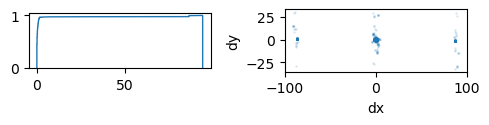

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(5,5))

ax=ax1
ax.hist(speed, bins=1000, density=True, histtype='step', cumulative=True, label='Empirical')
ax.set_aspect(30)

ax=ax2
ax.scatter(dx, dy, s=1, alpha=0.1, label='Empirical')
ax.set_aspect('equal')
ax.set_xlabel('dx')
ax.set_ylabel('dy')

fig.tight_layout()
plt.show(fig)
plt.close(fig)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

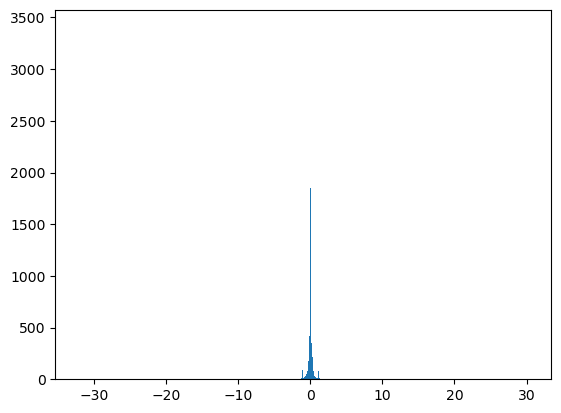

In [43]:
plt.hist(dy, bins=1000)

(array([2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        9.200e+01, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

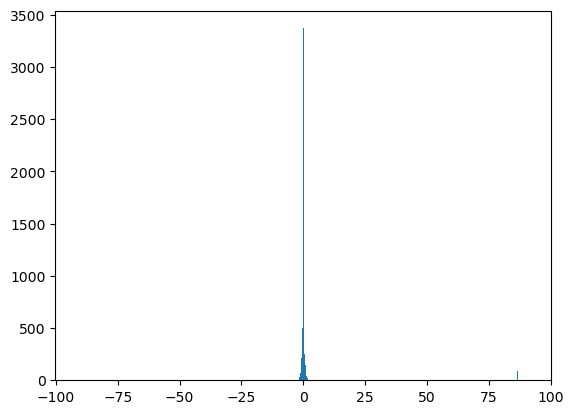

In [44]:
plt.hist(dx, bins=1000)